In [76]:
import xtools as xt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from past_atm.flight.flight import DUMMY_FLIGHT_RECAT
from past_atm.flight.scenario import ScenarioGenerator
from past_atm.separation import recat

In [84]:
config_name = "config.yaml"
cf = xt.Config(config_name)

In [85]:
sgen = ScenarioGenerator(cf.scenario)
vols = sgen(10)
dvols = vols.to_dataframe()

In [86]:
separation = recat.TBS

In [91]:
MERGIN = 10
last_vol = DUMMY_FLIGHT_RECAT
last_time = last_vol.ready
assign_times = []
separations = []
for vol in vols:
    sep = separation(last_vol, vol)
    time = np.max([last_time + sep + MERGIN, vol.ready])
    assign_times.append(time)
    separations.append(sep)

    last_vol = vol
    last_time = time
dvols["assign"] = assign_times

In [92]:
dvols

,code,ready,due,category,operation,assign
0,VOL0001,24,324,A,D,24
1,VOL0002,115,415,D,A,163
2,VOL0003,144,444,B,A,247
3,VOL0004,172,472,A,D,330
4,VOL0005,199,499,F,A,546
5,VOL0006,276,576,B,D,638
6,VOL0007,284,584,F,A,828
7,VOL0008,330,630,F,D,936
8,VOL0009,569,869,F,A,1044
9,VOL0010,889,1189,E,A,1136


In [93]:
separations = separations[1:]
separations

[129, 74, 73, 206, 82, 180, 98, 98, 82]

(0.0, 1236.0)

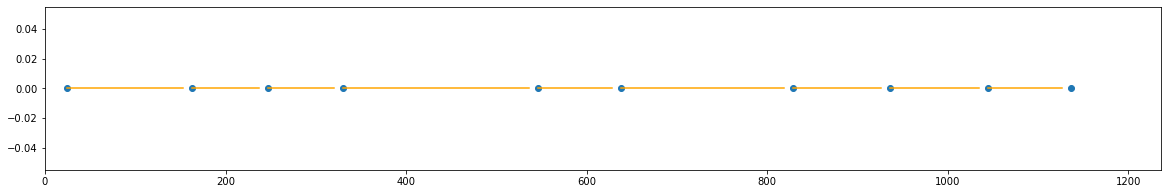

In [94]:
fig, ax = plt.subplots(figsize=(20, 3))
for i, sep in enumerate(separations):
    time_de = assign_times[i]
    time_to = assign_times[i] + sep
    ax.plot([time_de, time_to], [0,]*2, c="orange")
ax.scatter(x=assign_times, y=[0,]*len(assign_times))
ax.set_xlim([0, max(assign_times)+100])